In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [4]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [1 1 2 0 1 6 7 9 7 5]


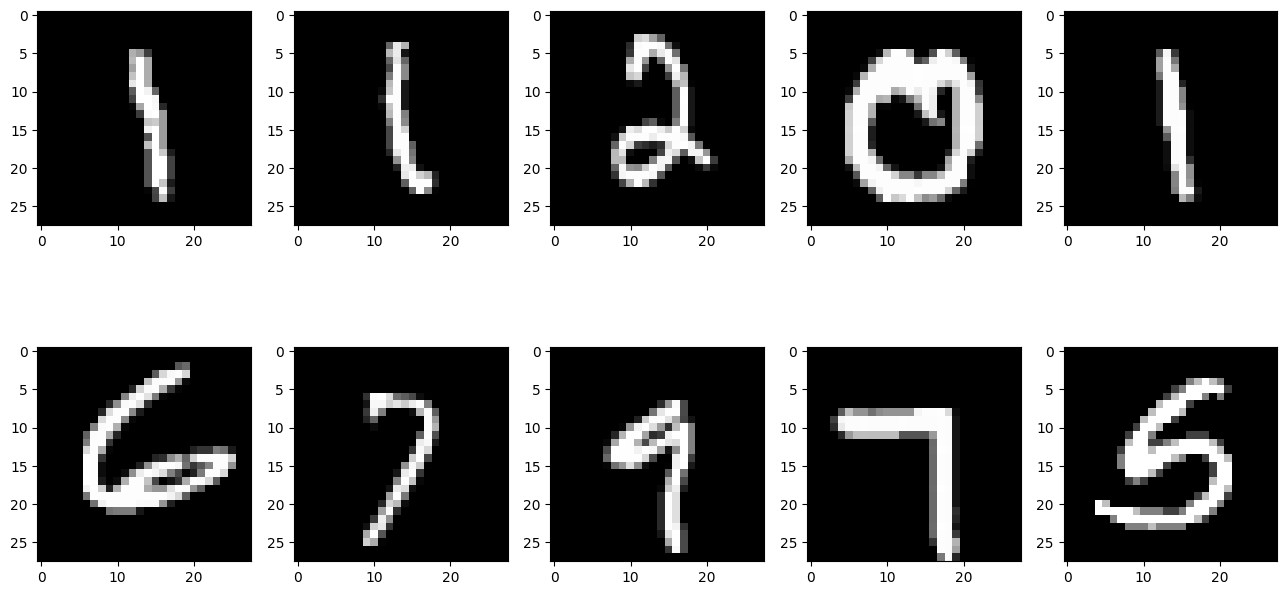

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [6]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [11]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 798,474 (3.05 MB)

 Trainable params: 798,474 (3.05 MB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [12]:
train_info = model.fit(new_train_data , new_train_target , epochs =10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8434 - loss: 0.5100
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9588 - loss: 0.1380
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9729 - loss: 0.0937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9759 - loss: 0.0763
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9794 - loss: 0.0646
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9831 - loss: 0.0551
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0447
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9883 - loss: 0.0373
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9888 - loss: 0.0346
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9902 - loss: 0.0288


Plot the loss and accuracy graphs

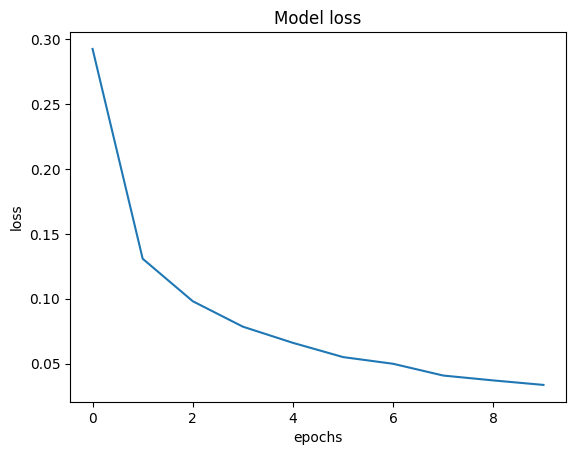

In [13]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

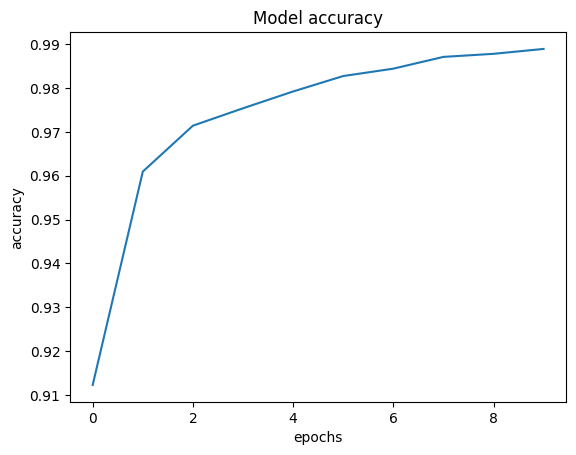

In [14]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [15]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9698 - loss: 0.1227
Loss of the Test dataset is: 0.10506594181060791
Accuracy of the test dataset is: 0.9736999869346619


Save the model weights

In [16]:
model.save_weights("MNIST_WEIGHTS_V1.weights.h5")


# **a**. **Improve test accuracy by changing hyperparameters**

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

# Load data
(train_data, train_target), (test_data, test_target) = mnist.load_data()
train_data, test_data = train_data/255.0, test_data/255.0
train_target_cat = to_categorical(train_target)
test_target_cat = to_categorical(test_target)

# Build improved model
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
train_info = model.fit(train_data, train_target_cat, epochs=15, batch_size=128, validation_split=0.1)

# Evaluate
loss, acc = model.evaluate(test_data, test_target_cat)
print(f'Improved Test Accuracy: {acc*100:.2f}%')

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8134 - loss: 0.6476 - val_accuracy: 0.9608 - val_loss: 0.1337
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9561 - loss: 0.1475 - val_accuracy: 0.9698 - val_loss: 0.1004
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9714 - loss: 0.0929 - val_accuracy: 0.9735 - val_loss: 0.0913
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9786 - loss: 0.0704 - val_accuracy: 0.9735 - val_loss: 0.0876
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9844 - loss: 0.0506 - val_accuracy: 0.9797 - val_loss: 0.0732
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9863 - loss: 0.0423 - val_accuracy: 0.9762 - val_loss: 0.0865
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9891 - loss: 0.0342 - val_accuracy: 0.9805 - val_loss: 0.0731
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9918 - loss: 0.0257 - val_accuracy: 0.

#**b. Add L1 and L2 regularization**

In [18]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_info = model.fit(train_data, train_target_cat, epochs=15, batch_size=128, validation_split=0.1)

loss, acc = model.evaluate(test_data, test_target_cat)
print(f'Test Accuracy with L2 Regularization: {acc*100:.2f}%')

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8117 - loss: 0.9773 - val_accuracy: 0.9613 - val_loss: 0.3762
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9553 - loss: 0.3786 - val_accuracy: 0.9652 - val_loss: 0.3119
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9657 - loss: 0.2987 - val_accuracy: 0.9702 - val_loss: 0.2636
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9707 - loss: 0.2545 - val_accuracy: 0.9643 - val_loss: 0.2576
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9738 - loss: 0.2303 - val_accuracy: 0.9762 - val_loss: 0.2116
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9756 - loss: 0.2064 - val_accuracy: 0.9802 - val_loss: 0.1934
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9785 - loss: 0.1924 - val_accuracy: 0.9763 - val_loss: 0.1965
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9775 - loss: 0.1851 - val_accuracy: 0.

#**c. Visualize class-wise test dataset performance**

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


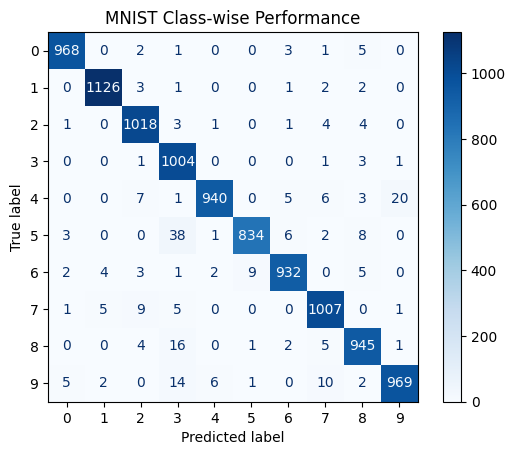

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Predict classes
predictions = model.predict(test_data)
pred_classes = np.argmax(predictions, axis=1)

# Confusion matrix
cm = confusion_matrix(test_target, pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("MNIST Class-wise Performance")
plt.show()